<p style="text-align:center;">
<img src="https://resources.digitalfutures.com/data-science/datascience-notebook-header.png"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

# What can current Data Scientists tell aspiring Data Scientist?
### Exploring the landscape of Kaggle Users 

Our team set out the aim of looking into what distinguishes jobseekers from those in the data science industry. We looked at differences in skills and experience as well as trends regarding education and gender.


We hope you will enjoy this notebook!

Alice, Aron, Ellisha, Yasmin

## Imports

In [1]:
import numpy as np
import pandas as pd

from itertools import combinations
import re

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
from pywaffle import Waffle


%matplotlib inline

In [2]:
df = pd.read_csv('kaggle_survey_21.csv')
df.head()

## as can be seen, the data frame needs formatting when it comes to headers

/Users/aron/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                 910                        50-54   
2                                 784                        50-54   
3                                 924                        22-24   
4                                 575                        45-49   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                      India   
2                                  Indonesia   
3                                   Pakistan   
4                                     Mexico   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                  Bachelor’s degree   
2                                    Master’s degree   
3                                    Master’s degree   
4                                    Doctoral degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                              Other   
2                            Program/Project Manager   
3                                  Software Engineer   
4                                 Research Scientist   

                                                  Q6  \
0  For how many years have you been writing code ...   
1                                         5-10 years   
2                                          20+ years   
3                                          1-3 years   
4                                          20+ years   

                                           Q7_Part_1  \
0  What programming languages do you use on a reg...   
1                                             Python   
2                                                NaN   
3                                             Python   
4                                             Python   

                                           Q7_Part_2  \
0  What programming languages do you use on a reg...   
1                                                  R   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_3  ...  \
0  What programming languages do you use on a reg...  ...   
1                                                NaN  ...   
2                                                SQL  ...   
3                                                NaN  ...   
4                                                NaN  ...   

                                        Q38_B_Part_3  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q38_B_Part_4  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q38_B_Part_5  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                       TensorBoard    
4              

## Cleaning: Addressing headers

The plan is to create a data frame with double headers. The top row would be the question number (with a short name) while the bottom row the question in short / possible answers where its a multiple choice type of question.

In [3]:
## Creating a new list of headers. Using regex, we only keep Q plus the question number and whether it was a
## B question
cols = df.columns.copy()
top_h = []

for i in cols:
    top_h.append(''.join(re.findall(r'[Q]\d+|[B]', i)).lower())

## reassign the first member as 'q0' for consistency
top_h[0] = 'q0'
pd.Series(top_h).unique()

array(['q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10',
       'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19',
       'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28',
       'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37',
       'q38', 'q39', 'q40', 'q41', 'q42', 'q27b', 'q29b', 'q30b', 'q31b',
       'q32b', 'q34b', 'q36b', 'q37b', 'q38b'], dtype=object)

In [4]:
## writing a short description of what each question asks for

q_list = ['duration', 'age', 'gender', 'country', 'education', 'title', 'yrs_of_experience', 'language',
          'language_recommend', 'ide', 'notebook', 'computing_platform', 'hardware', 'tpu_use', 'viz', 'yrs_ml', 'ml',
          'ml_algorithm', 'comp_vision', 'nlp', 'industry', 'company_size', 'ds_team', 'ml_at_workplace', 'roles',
          'salary', 'ml_spend', 'cloud_platf', 'fav_cloud', 'cloud_prod', 'data_storage_prod', 'managed_ml_prod',
          'bd_prod', 'fav_bd', 'bi_tool', 'fav_bi', 'auto_ml', 'auto_ml_prod', 'ml_experiment_manager', 'publishing',
          'ds_course', 'ds_tool', 'media_source', 'future_cloud_platf', 'future_cloud_prod',
          'future_data_storage_prod', 'future_managed_ml_prod', 'future_bd_prod', 'future_bi_tool', 'future_auto_ml',
          'future_auto_ml_prod', 'future_ml_experiment_manager']

In [5]:
## next, we define a dictionary that maps each unique question number to the corresponding short description

d_header = {}
for i in list(zip(pd.Series(top_h).unique(), q_list)):
    d_header.update({i[0] : i[1]})

In [6]:
## finally, we create the final list of question headers using the original question numbers and their corresponding
## descriptions from the dictionary

top_h2 = []

for i in top_h:
    top_h2.append(i + '_' + d_header[i])

print(top_h2[: 20])

['q0_duration', 'q1_age', 'q2_gender', 'q3_country', 'q4_education', 'q5_title', 'q6_yrs_of_experience', 'q7_language', 'q7_language', 'q7_language', 'q7_language', 'q7_language', 'q7_language', 'q7_language', 'q7_language', 'q7_language', 'q7_language', 'q7_language', 'q7_language', 'q7_language']


In [7]:
## next, we start defining our sub-headers

low_h = []

for i in range(len(top_h2)):
    ## if the count of an individual header is greater than 1, that means its a multiple choice type question.
    ## for these, we want each sub-header to represent the answer given
    if top_h2.count(top_h2[i]) != 1:
        ## these questions all would have ' - Selected Choice - ' before the given answer, so we sliced the strings
        ## to return only what's on the right of this
        low_h.append(df.iloc[0, i][df.iloc[0, i].rfind(' - ') + 3:])
    else:
        ## when there is only one of the unique header in the list, we just repeated the short description after the
        ## question number to create the subheader
        low_h.append(top_h2[i][top_h2[i].find('_') + 1:])

In [8]:
## finally, we also formatted the strings to make them more compact (note that 'c++' would become 'cpp', which is 
## something to keep in mind when working with the language columns)

for i in range(len(low_h)):
    low_h[i] = low_h[i].split('(')[0].strip().lower().replace('&', '').replace('++', 'pp').replace('+', '').replace('/', '').replace('.', '_').replace('-', '_').replace('  ', ' ').replace(' ', '_')


In [9]:
## now, we are ready to create a MultiIndex object using pandas

index = pd.MultiIndex.from_arrays([top_h2, low_h])
index[: 5]

MultiIndex([( 'q0_duration',  'duration'),
            (      'q1_age',       'age'),
            (   'q2_gender',    'gender'),
            (  'q3_country',   'country'),
            ('q4_education', 'education')],
           )

In [10]:
## we then drop the first row of the data frame (this will be replaced by the sub-headers) and assign the MultiIndex
## object as the columns

df.drop(0, axis = 0, inplace = True)
df.columns = index
df.head()

q0_duration q1_age q2_gender q3_country       q4_education  \
     duration    age    gender    country          education   
1         910  50-54       Man      India  Bachelor’s degree   
2         784  50-54       Man  Indonesia    Master’s degree   
3         924  22-24       Man   Pakistan    Master’s degree   
4         575  45-49       Man     Mexico    Doctoral degree   
5         781  45-49       Man      India    Doctoral degree   

                  q5_title q6_yrs_of_experience q7_language            ...  \
                     title    yrs_of_experience      python    r  sql  ...   
1                    Other           5-10 years      Python    R  NaN  ...   
2  Program/Project Manager            20+ years         NaN  NaN  SQL  ...   
3        Software Engineer            1-3 years      Python  NaN  NaN  ...   
4       Research Scientist            20+ years      Python  NaN  NaN  ...   
5                    Other            < 1 years      Python  NaN  NaN  ...   

  q38b_future_ml_experiment_manager                                           \
                           comet_ml sacred_omniboard    tensorboard guild_ai   
1                               NaN              NaN            NaN      NaN   
2                               NaN              NaN            NaN      NaN   
3                               NaN              NaN   TensorBoard       NaN   
4                               NaN              NaN            NaN      NaN   
5                               NaN              NaN            NaN      NaN   

                                                            
  polyaxon clearml domino_model_monitor mlflow  none other  
1      NaN     NaN                  NaN    NaN   NaN   NaN  
2      NaN     NaN                  NaN    NaN  None   NaN  
3      NaN     NaN                  NaN    NaN   NaN   NaN  
4      NaN     NaN                  NaN    NaN  None   NaN  
5      NaN     NaN                  NaN    NaN   NaN   NaN  

[5 rows x 369 columns]

In [11]:
## to make slicing possible, columns on both level have to be lexsorted

cols = list(df.columns)
# first, we sort the questions themselves
cols.sort(key = lambda x: x[1])
# then, we rearrange by question numbers
cols.sort()
cols[: 5]

[('q0_duration', 'duration'),
 ('q10_notebook', 'amazon_emr_notebooks'),
 ('q10_notebook', 'amazon_sagemaker_studio_notebooks'),
 ('q10_notebook', 'azure_notebooks'),
 ('q10_notebook', 'binder_jupyterhub')]

In [12]:
df = df[cols]
df.head()

q0_duration         q10_notebook                                    \
     duration amazon_emr_notebooks amazon_sagemaker_studio_notebooks   
1         910                  NaN                               NaN   
2         784                  NaN                               NaN   
3         924                  NaN                               NaN   
4         575                  NaN                               NaN   
5         781                  NaN                               NaN   

                                                                 \
  azure_notebooks binder_jupyterhub code_ocean  colab_notebooks   
1             NaN               NaN        NaN  Colab Notebooks   
2             NaN               NaN        NaN  Colab Notebooks   
3             NaN               NaN        NaN              NaN   
4             NaN               NaN        NaN  Colab Notebooks   
5             NaN               NaN        NaN              NaN   

                                                                               \
  databricks_collaborative_notebooks deepnote_notebooks  google_cloud_datalab   
1                                NaN                NaN                   NaN   
2                                NaN                NaN                   NaN   
3                                NaN                NaN                   NaN   
4                                NaN                NaN                   NaN   
5                                NaN                NaN  Google Cloud Datalab   

   ... q9_ide                                                       \
   ...   none      notepadpp  other    pycharm rstudio      spyder   
1  ...    NaN            NaN    NaN        NaN     NaN         NaN   
2  ...    NaN    Notepad++      NaN        NaN     NaN         NaN   
3  ...    NaN            NaN  Other   PyCharm      NaN         NaN   
4  ...    NaN            NaN    NaN        NaN     NaN    Spyder     
5  ...    NaN            NaN    NaN        NaN     NaN    Spyder     

                                                                  
  sublime_text        vim_emacs visual_studio visual_studio_code  
1          NaN    Vim / Emacs             NaN                NaN  
2          NaN              NaN           NaN                NaN  
3          NaN              NaN           NaN                NaN  
4          NaN              NaN           NaN                NaN  
5          NaN              NaN           NaN                NaN  

[5 rows x 369 columns]

## Cleaning: Getting binary

The next step is to create a binary representation of the multiple choice questions. Since indexing with double headers is somewhat tricky, a function to do this was created.

In [13]:
## first, we define an IndexSlice object that makes navigation between columns possible.

def binaray(df, cols, idx = pd.IndexSlice):
    '''binary ray: takes a data frame and a list of column names to binarise
    - df: pandas.DataFrame with double column headers
    - cols: list of super-header column names or string of a single column name
    - idx: pandas.IndexSlice object'''
    if type(cols) == str:
        ## if its only a single column name, we create a list from it
        cols = [cols]
    if not (set(cols) <= set(df.columns.levels[0])):
        ## making sure that all columns specified are in the columns actually – this is to prevent running the code
        ## twice on the same column, causing it to make all values 1
        return 'error: some column names were specified incorrectly'
    for c in cols:
        ## looping through the sub-headers and replacing null values with 0 and other by 1
        for i in df[c].columns:
            n_val = np.where(df[c][i].isnull(), 0, 1)
            df.loc[:, idx[c, i]] = n_val
    return df

In [14]:
## creating a list of all columns that need to be binarised

binary_list = []

for i in df.columns.levels[0]:
    uniques = True
    for j in df[i].columns:
        if len(df[i][j].unique()) != 2:
            uniques = False
    if uniques:
        binary_list.append(i)

In [15]:
## then binarising them

binaray(df, binary_list)
df.head()

q0_duration         q10_notebook                                    \
     duration amazon_emr_notebooks amazon_sagemaker_studio_notebooks   
1         910                    0                                 0   
2         784                    0                                 0   
3         924                    0                                 0   
4         575                    0                                 0   
5         781                    0                                 0   

                                                                \
  azure_notebooks binder_jupyterhub code_ocean colab_notebooks   
1               0                 0          0               1   
2               0                 0          0               1   
3               0                 0          0               0   
4               0                 0          0               1   
5               0                 0          0               0   

                                                                              \
  databricks_collaborative_notebooks deepnote_notebooks google_cloud_datalab   
1                                  0                  0                    0   
2                                  0                  0                    0   
3                                  0                  0                    0   
4                                  0                  0                    0   
5                                  0                  0                    1   

   ... q9_ide                                                                \
   ...   none notepadpp other pycharm rstudio spyder sublime_text vim_emacs   
1  ...      0         0     0       0       0      0            0         1   
2  ...      0         1     0       0       0      0            0         0   
3  ...      0         0     1       1       0      0            0         0   
4  ...      0         0     0       0       0      1            0         0   
5  ...      0         0     0       0       0      1            0         0   

                                    
  visual_studio visual_studio_code  
1             0                  0  
2             0                  0  
3             0                  0  
4             0                  0  
5             0                  0  

[5 rows x 369 columns]

## Cleaning: Filtering and creating subsets

In this section, we filtered the data and created subsets that will be useful for our analysis. We mainly filtered based on response time, some questionnaires took almost 700(!) hours to complete, whilst some of them took 2 minutes. We plotted the distribution and found that up til 2 hours it is pretty much a bell curve, so we set that as an upper limit and cut everything below 5 minutes.<br>
For subsets, our two main groups were data science related professions and students / unemployed identified as jobseekers.

/Users/aron/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


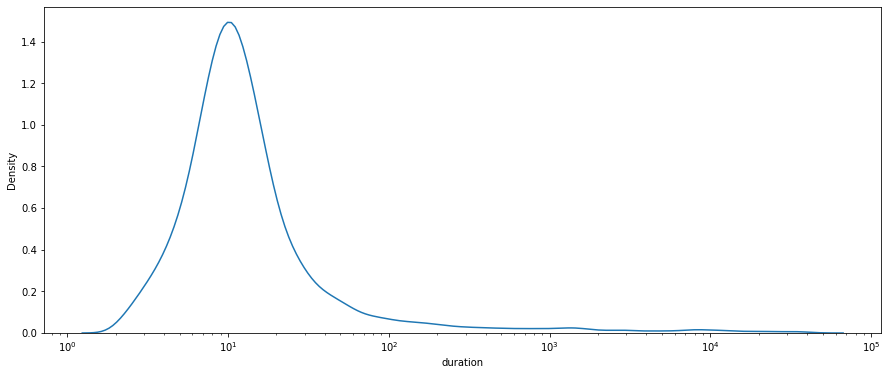

In [16]:
## looking at the distribution of the time it took for respondentss, we decided that 5 minutes to 2 hrs was a
## reasonable limit to cut respondents

f, ax = plt.subplots(figsize=(15, 6))
ax.set_xscale("log")

sns.distplot(df.q0_duration.duration.astype('int') / 60)
plt.show()

In [17]:
df_fil = df.loc[(df.q0_duration.duration.astype('int') >= 300) & (df.q0_duration.duration.astype('int') <= 7200), :].copy()


In [18]:
## we also replace some of the values in the age and education columns, to make the analysis neater

df_fil[('q1_age', 'age')] = df_fil.q1_age.age.replace(['60-69', '70+'], '60+')
df_fil[('q4_education', 'education')] = (df_fil.q4_education.education
                                         .replace(['Doctoral degree', 'Professional doctorate'], 'PhD'))
df_fil[('q4_education', 'education')] = (df_fil.q4_education.education
                                         .replace('Some college/university study without earning a bachelor’s degree',
                                                  'College/university study without Bachelor’s'))
df_fil[('q4_education', 'education')] = (df_fil.q4_education.education
                                         .replace('I prefer not to answer', 'Prefer not to answer'))


In [19]:
## grouping of titles

d_title = {'Data Scientist': 'Data Scientist', 'Machine Learning Engineer': 'Data Scientist',
           'Data Engineer': 'Data Scientist', 'Data Analyst': 'Data Scientist', 'Software Engineer': 'Developer',
           'DBA/Database Engineer': 'Developer', 'Statistician': 'Other Data Role',
           'Program/Project Manager': 'Other Data Role', 'Research Scientist': 'Other Data Role',
           'Business Analyst': 'Other Data Role', 'Product Manager': 'Other Data Role',
           'Developer Relations/Advocacy': 'Other Data Role', 'Student': 'Student/Not Employed',
           'Currently not employed': 'Student/Not Employed', 'Other': 'Other'}

## putting students and not employed separately

d_title2 = {'Data Scientist': 'Data Scientist', 'Machine Learning Engineer': 'Data Scientist',
           'Data Engineer': 'Data Scientist', 'Data Analyst': 'Data Scientist', 'Software Engineer': 'Developer',
           'DBA/Database Engineer': 'Developer', 'Statistician': 'Other Data Role',
           'Program/Project Manager': 'Other Data Role', 'Research Scientist': 'Other Data Role',
           'Business Analyst': 'Other Data Role', 'Product Manager': 'Other Data Role',
           'Developer Relations/Advocacy': 'Other Data Role', 'Student': 'Student',
           'Currently not employed': 'Not Employed', 'Other': 'Other'}

In [20]:
df_fil[('r01_title', 'title')] = df_fil.q5_title.title.map(d_title)
df_fil[('r01_title', 'title_sep')] = df_fil.q5_title.title.map(d_title2)
df_fil.head()

q0_duration         q10_notebook                                    \
     duration amazon_emr_notebooks amazon_sagemaker_studio_notebooks   
1         910                    0                                 0   
2         784                    0                                 0   
3         924                    0                                 0   
4         575                    0                                 0   
5         781                    0                                 0   

                                                                \
  azure_notebooks binder_jupyterhub code_ocean colab_notebooks   
1               0                 0          0               1   
2               0                 0          0               1   
3               0                 0          0               0   
4               0                 0          0               1   
5               0                 0          0               0   

                                                                              \
  databricks_collaborative_notebooks deepnote_notebooks google_cloud_datalab   
1                                  0                  0                    0   
2                                  0                  0                    0   
3                                  0                  0                    0   
4                                  0                  0                    0   
5                                  0                  0                    1   

   ... q9_ide                                                              \
   ...  other pycharm rstudio spyder sublime_text vim_emacs visual_studio   
1  ...      0       0       0      0            0         1             0   
2  ...      0       0       0      0            0         0             0   
3  ...      1       1       0      0            0         0             0   
4  ...      0       0       0      1            0         0             0   
5  ...      0       0       0      1            0         0             0   

                            r01_title                   
  visual_studio_code            title        title_sep  
1                  0            Other            Other  
2                  0  Other Data Role  Other Data Role  
3                  0        Developer        Developer  
4                  0  Other Data Role  Other Data Role  
5                  0            Other            Other  

[5 rows x 371 columns]

In [21]:
## we also created different segments of survey respondents, such as people in data science related roles:

df_ds = df_fil[df_fil.r01_title.title == 'Data Scientist']
df_ds = df_ds[df_ds.q6_yrs_of_experience.yrs_of_experience != 'I have never written code']

## jobseekers

df_js = df_fil[df_fil.r01_title.title == 'Student/Not Employed'].copy()

# General Overview of Roles

To start with, we created a few general descriptions of all roles included.

In [22]:
## creating a pivot table for a stacked barchart visualisation:

st_role = (df_fil.groupby([('r01_title', 'title'), ('q5_title', 'title')]).count()
           .pivot_table([('q0_duration', 'duration')], [('r01_title', 'title')], [('q5_title', 'title')]).fillna(0)
           .reindex(['Other', 'Developer', 'Other Data Role','Student/Not Employed', 'Data Scientist'], copy = True))
## renaming columns, which have tuple names, due to pivoting a multi-header set
st_role.columns = [i[2] for i in st_role.columns]

<ipython-input-23-1bf3d0d86c8c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(st_role.index, fontfamily = 'serif')


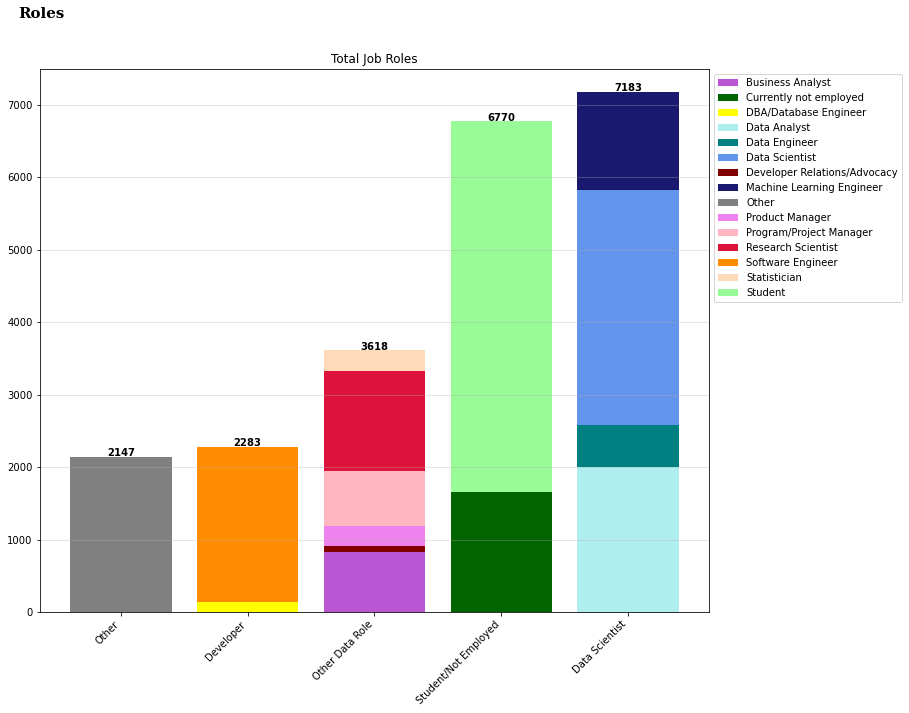

In [23]:
fig, ax = plt.subplots(1, figsize=(12, 10))

colors = ['mediumorchid', 'darkgreen', 'yellow', 'paleturquoise', 'teal', 'cornflowerblue', 'maroon',
          'midnightblue', 'grey', 'violet', 'lightpink', 'crimson', 'darkorange', 'peachpuff', 'palegreen']
bottom = np.zeros(len(st_role))

for i, col in enumerate(st_role.columns):
    ax.bar(st_role.index, st_role[col], bottom = bottom, label = col, color = colors[i])
    bottom += np.array(st_role[col])

totals = st_role.sum(axis=1)

# Set an offset that is used to bump the label up a bit above the bar.
y_offset = 4
# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight = 'bold')
        
# for s in ['top', 'left', 'right']:
#     ax.spines[s].set_visible(False)
ax.set_xticklabels(st_role.index, fontfamily = 'serif')
# ax.set_yticklabels(np.arange(0, 4001, 500),fontfamily='serif')
fig.text(0.1, 0.95, 'Roles', fontsize = 15, fontweight = 'bold', fontfamily = 'serif')    
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)    
ax.set_title('Total Job Roles')
ax.legend(bbox_to_anchor = (1, 1))
plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight ='normal',
           fontfamily = 'sans-serif')
ax.set_ylim([0, 7500])


plt.show()

There were 15 unique roles defined in the dataset. We split these into 5 major categories. For most of this book, we will focus on the two largest, Student/Not Employed and the Data Scientist, categories.

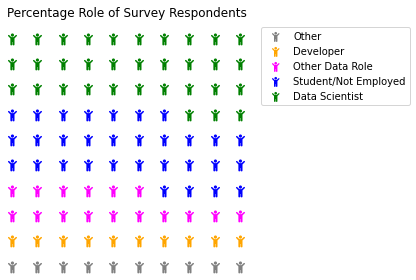

In [24]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values= dict(df_fil.r01_title.title.value_counts(normalize = True, ascending = True) * 100), 
    colors=["grey", "orange", "fuchsia", 'blue',  'green'],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', 
    font_size=12, 
    vertical = True,
    icon_legend=True
)
plt.title('Percentage Role of Survey Respondents', loc='left')
plt.show()

#### How to define a Data Scientist:


Data Scientist is still a relatively new role.


The following roles were chosen for this analysis:

- Data Scientist

- Data Analyst

- Data Engineer

- Machine Learning Engineer

# General Overview of Jobseekers

Next, we placed our focus on the subset of jobseekers (students and currently not employed).

In [25]:
agedict = {'18-21': '18-21','22-24': '22-24','25-29': '25-29','30-34': '30:34'}
for i in df_js[('q1_age', 'age')].unique():
    if i not in agedict:
        agedict[i] = '35+'

df_js[('r02_age', 'age')] = df_js[('q1_age', 'age')].map(agedict)


genddict = {'Man':'Male','Woman':'Female'}
for i in df_js[('q2_gender', 'gender')].unique():
    if i not in genddict:
        genddict[i] = 'Other'

df_js[('r03_gender', 'gender')] = df_js[('q2_gender', 'gender')].map(genddict)

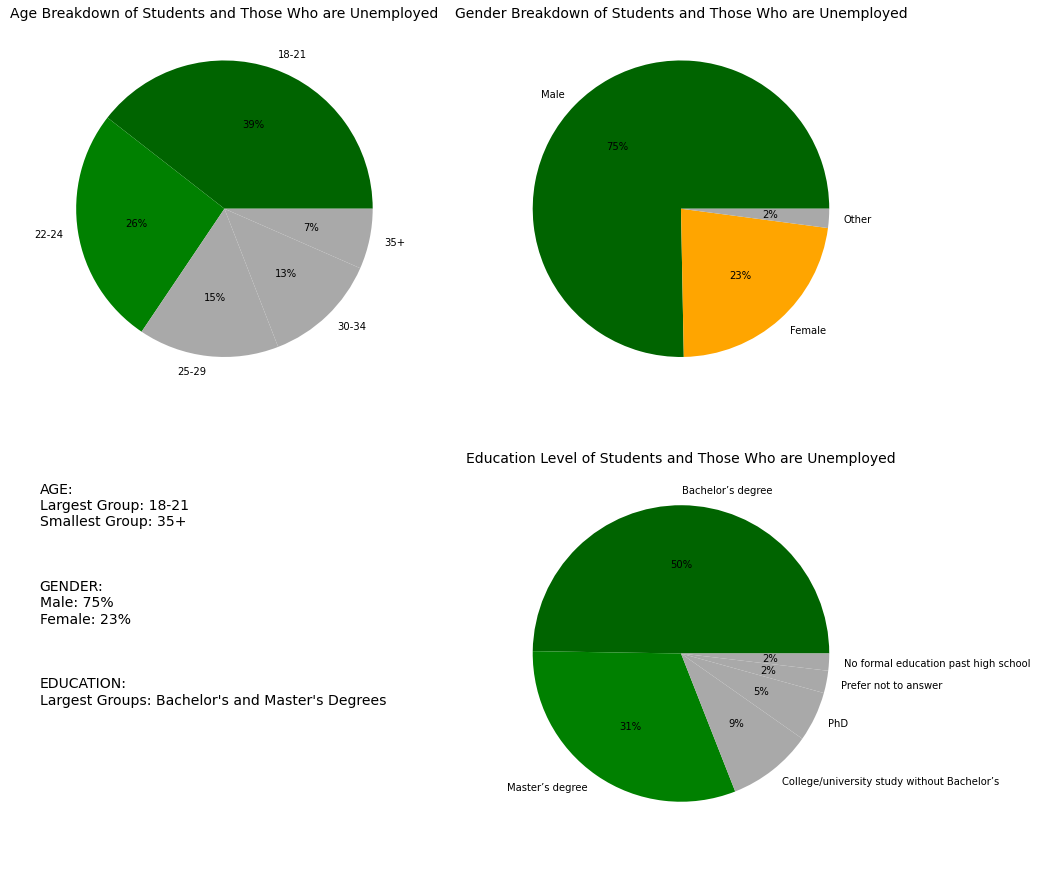

In [26]:
sj_age = df_js.r02_age.age.value_counts()
labels_age = ['18-21','22-24','25-29','30-34','35+']
colors_age = ['darkgreen', 'green', 'darkgrey', 'darkgrey', 'darkgrey']

sj_gender = df_js.r03_gender.gender.value_counts()
labels_gender = ['Male','Female','Other']
colors_gender = ['darkgreen', 'orange', 'darkgrey']

labels_edu = df_js.q4_education.education.value_counts().index
colors_edu = ['darkgreen', 'green', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey']


plt.figure(figsize = (15, 15))

plt.subplot(2, 2, 1)
plt.pie(x = sj_age, labels = labels_age, autopct='%.0f%%', colors = colors_age)
plt.title('Age Breakdown of Students and Those Who are Unemployed', fontsize = 14)

plt.subplot(2, 2, 2)
plt.pie(x = sj_gender, labels = labels_gender, colors = colors_gender, autopct = '%.0f%%')
plt.title('Gender Breakdown of Students and Those Who are Unemployed', fontsize = 14)

plt.subplot(2, 2, 4)
plt.pie(x = df_js.q4_education.education.value_counts(), labels = labels_edu, autopct = '%.0f%%', colors = colors_edu)
plt.title('Education Level of Students and Those Who are Unemployed', fontsize = 14)

ax = plt.axes([0.1, 0.1, 0.3, 0.3])
ax.text(0.1, 0.5, 'AGE:\nLargest Group: 18-21\nSmallest Group: 35+\n\n\n\nGENDER:\nMale: 75%\nFemale: 23%\n\n\n\nEDUCATION:\nLargest Groups: Bachelor\'s and Master\'s Degrees',
        fontsize = 14)
ax.axis('off')

plt.show()


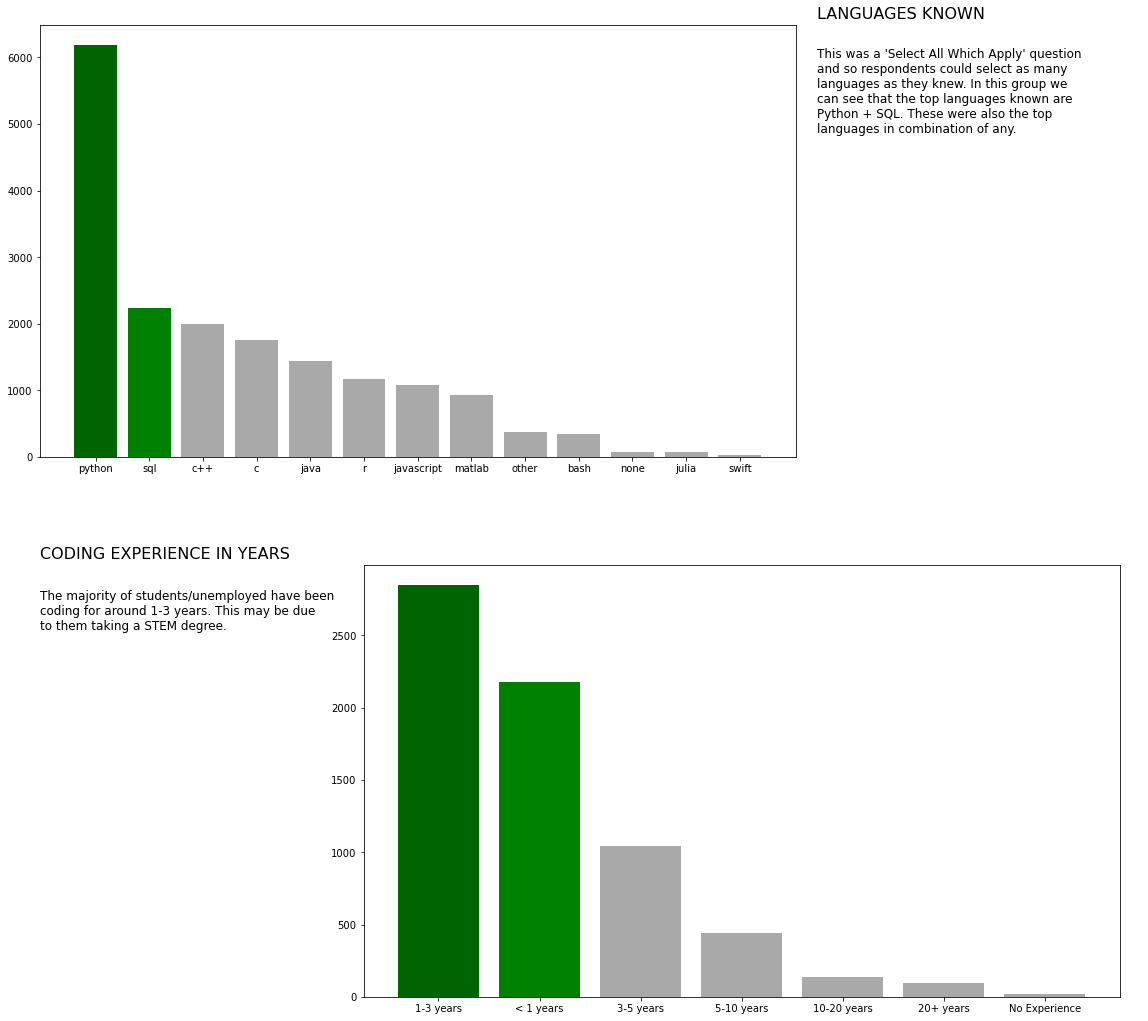

In [27]:
labels_lan = pd.Series(df_js.q7_language.sum().sort_values(ascending = False).index).replace('cpp', 'c++')
colors_lan = ['darkgreen', 'green', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey',
          'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey']

labels_exp = pd.Series(df_js.q6_yrs_of_experience.yrs_of_experience.value_counts().index)
labels_exp[6] = 'No Experience'
colors_exp = ['darkgreen', 'green', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey']


plt.figure(figsize = (15, 15))


ax1 = plt.axes([0.0, 0.6, 0.7, 0.4])
ax2 = plt.axes([0.3, 0.1, 0.7, 0.4])
ax3 = plt.axes([0.72, 0.6, 0.3, 0.4])
ax4 = plt.axes([0.0, 0.1, 0.3, 0.4])

ax1.bar(labels_lan, df_js.q7_language.sum().sort_values(ascending = False), color = colors_lan)
plt.ylabel('Number of Occurences')
plt.xlabel('')
plt.xticks(rotation=45)

ax2.bar(labels_exp, df_js.q6_yrs_of_experience.yrs_of_experience.value_counts(), color = colors_exp)
plt.ylabel('Number of Occurences')

ax3.text(0.0, 0.75, 'This was a \'Select All Which Apply\' question\nand so respondents could select as many\nlanguages as they knew. In this group we\ncan see that the top languages known are\nPython + SQL. These were also the top\nlanguages in combination of any.',
        fontsize = 12)
ax3.set_title('LANGUAGES KNOWN', loc = 'left', fontsize = 16)
ax3.axis('off')

ax4.text(0.0, 0.85, 'The majority of students/unemployed have been\ncoding for around 1-3 years. This may be due\nto them taking a STEM degree.',
         fontsize = 12)
ax4.set_title('CODING EXPERIENCE IN YEARS', loc = 'left', fontsize = 16)
ax4.axis('off')

plt.show()

# Jobseekers vs Data Scientists

We were interested in what separates those seeking jobs and those who are already in the data science industry (important to mention that not all jobseekers would like to pursue a data science career who filled the survey). So, we compared these two groups based on various aspects.

## Online courses

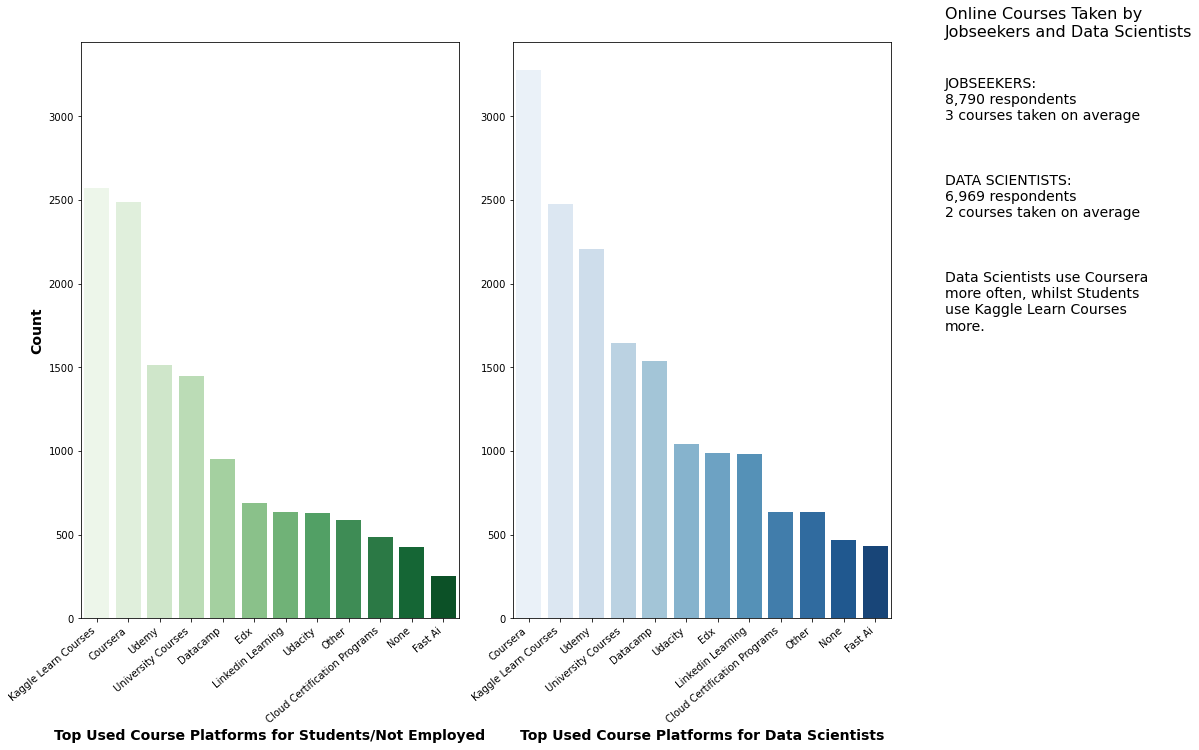

In [28]:
plt.figure(figsize = (15, 8))

ax1 = plt.axes([0.0, 0.0, 0.35, 1.0])
ax2 = plt.axes([0.4, 0.0, 0.35, 1.0], sharey = ax1)
ax3 = plt.axes([0.8, 0.0, 0.2, 1.0])
ax3.axis('off')

x_ax1 = [i.replace('_', ' ').title() for i in df_js.q40_ds_course.sum().sort_values(ascending = False).index]

sns.barplot(x = x_ax1,
            y = df_js.q40_ds_course.sum().sort_values(ascending = False),
            palette = 'Greens',
            ax = ax1)

ax1.set_xlabel('Top Used Course Platforms for Students/Not Employed', fontsize = '14', fontweight = 'bold')
ax1.set_ylabel('Count', fontsize = '14', fontweight = 'bold')
ax1.set_xticklabels(labels = x_ax1, rotation = 40, fontfamily = 'sans-serif', ha = 'right')


x_ax2 = [i.replace('_', ' ').title() for i in df_ds.q40_ds_course.sum().sort_values(ascending = False).index]

sns.barplot(x = x_ax2,
            y = df_ds.q40_ds_course.sum().sort_values(ascending = False),
            palette = "Blues",
            ax = ax2)

ax2.set_xlabel('Top Used Course Platforms for Data Scientists', fontsize = '14', fontweight = 'bold')
ax2.set_xticklabels(labels = x_ax2, rotation = 40, fontfamily = 'sans-serif', ha = 'right')


ax3.text(0.0, 0.5,
         'JOBSEEKERS:\n8,790 respondents\n3 courses taken on average\n\n\n\nDATA SCIENTISTS:\n6,969 respondents\n2 courses taken on average\n\n\n\nData Scientists use Coursera\nmore often, whilst Students\nuse Kaggle Learn Courses\nmore.',
         fontsize = 14)
ax3.set_title('Online Courses Taken by\nJobseekers and Data Scientists', fontsize = 16, loc = 'left')

plt.show()


From this insight, we can see that continuous online learning is important to both of our key groups. Jobseekers on average have taken one further course than Data Scientists, potentially showing that they're slightly more eager to learn.

## Age by role

In [29]:
## creating age groups for visualisation

age_gr = df_fil.groupby([('r01_title', 'title_sep'), ('q1_age', 'age')]).size().unstack(level = -1).reset_index()
age_gr = age_gr.transpose()
age_gr = age_gr.rename(columns = age_gr.iloc[0])
age_gr = age_gr.drop(age_gr.index[0])

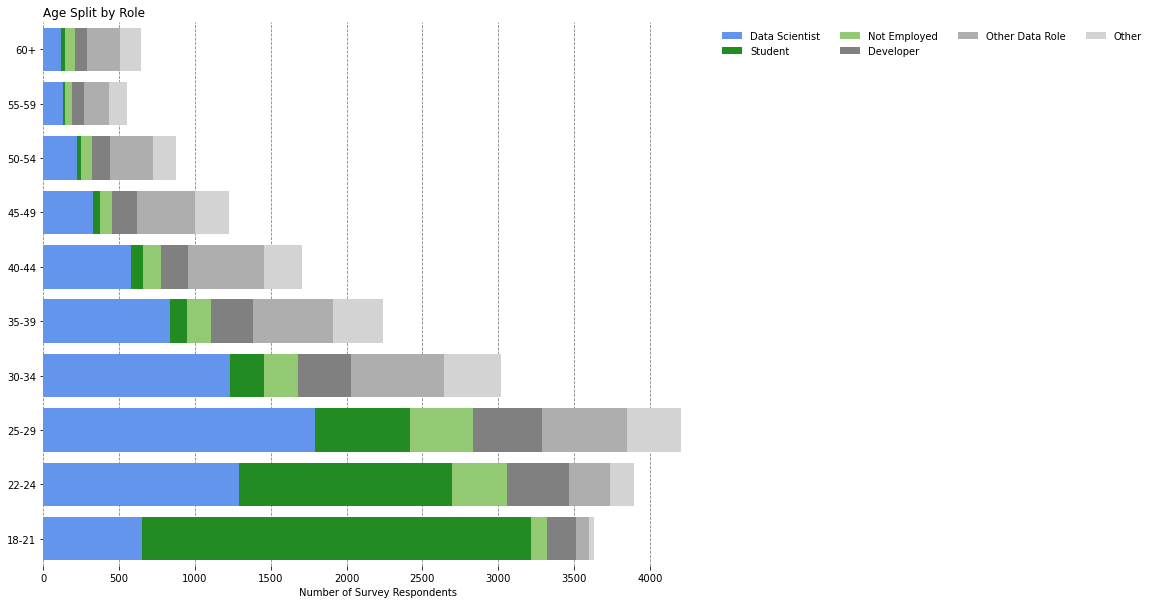

In [30]:
fields = ['Data Scientist', 'Student', 'Not Employed', 'Developer', 'Other Data Role', 'Other']
colors = ['cornflowerblue', 'forestgreen', '#94C973', 'grey', '#AEAEAE', 'lightgrey', 'cadetblue']
labels = ['Data Scientist', 'Student', 'Not Employed', 'Developer', 'Other Data Role', 'Other']


fig, ax = plt.subplots(1, figsize=(12, 10))

left = len(age_gr) * [0]
for idx, name in enumerate(fields):
    plt.barh(age_gr.index, age_gr[name], left = left, color = colors[idx])
    left = left + age_gr[name]

plt.title('Age Split by Role', loc = 'left')
plt.legend(labels, bbox_to_anchor = ([1, 1, 0, 0]), ncol = 4, frameon = False, loc = 2, prop = {'size': 10})
plt.xlabel('Number of Survey Respondents')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color = 'gray', linestyle = 'dashed')


plt.show()

#### Data Scientists:
The highest number of Data Scientists are within the 25-29 age bracket.
<br><br>
#### Jobseekers:
Students populate the lower age brackets, particularly 18-21.
<br><br><br>
A low number of individuals in the 18-21 age bracket are Data Scientists. This is likely because many people are pursuing higher education at these ages and may not necessarily be looking for a job as yet.
<br>
Jobseekers should be encouraged by the range of ages in the field. One is never too young or too old to be a Data Scientist.

## Gender diversity

In [31]:
## preparing data for the horizontal bar chart

gr2 = (df_fil.groupby([('q5_title', 'title'), ('q2_gender', 'gender')]).size().unstack(level=-1).reset_index())
gr2 = gr2.fillna(0)
gr2 = gr2.transpose()
gr2 = gr2.rename(columns = gr2.iloc[0])
gr2 = gr2.drop(gr2.index[0])
cols = gr2.columns  
gr2[cols] = round(gr2[cols] / (gr2[cols].sum())*100, 2)
gr2 = gr2.reindex(index = ['Man','Woman','Nonbinary', 'Prefer to self-describe', 'Prefer not to say'])
gr2 = gr2.transpose()
gr2 = gr2.sort_values(by = ['Woman'], ascending=False)

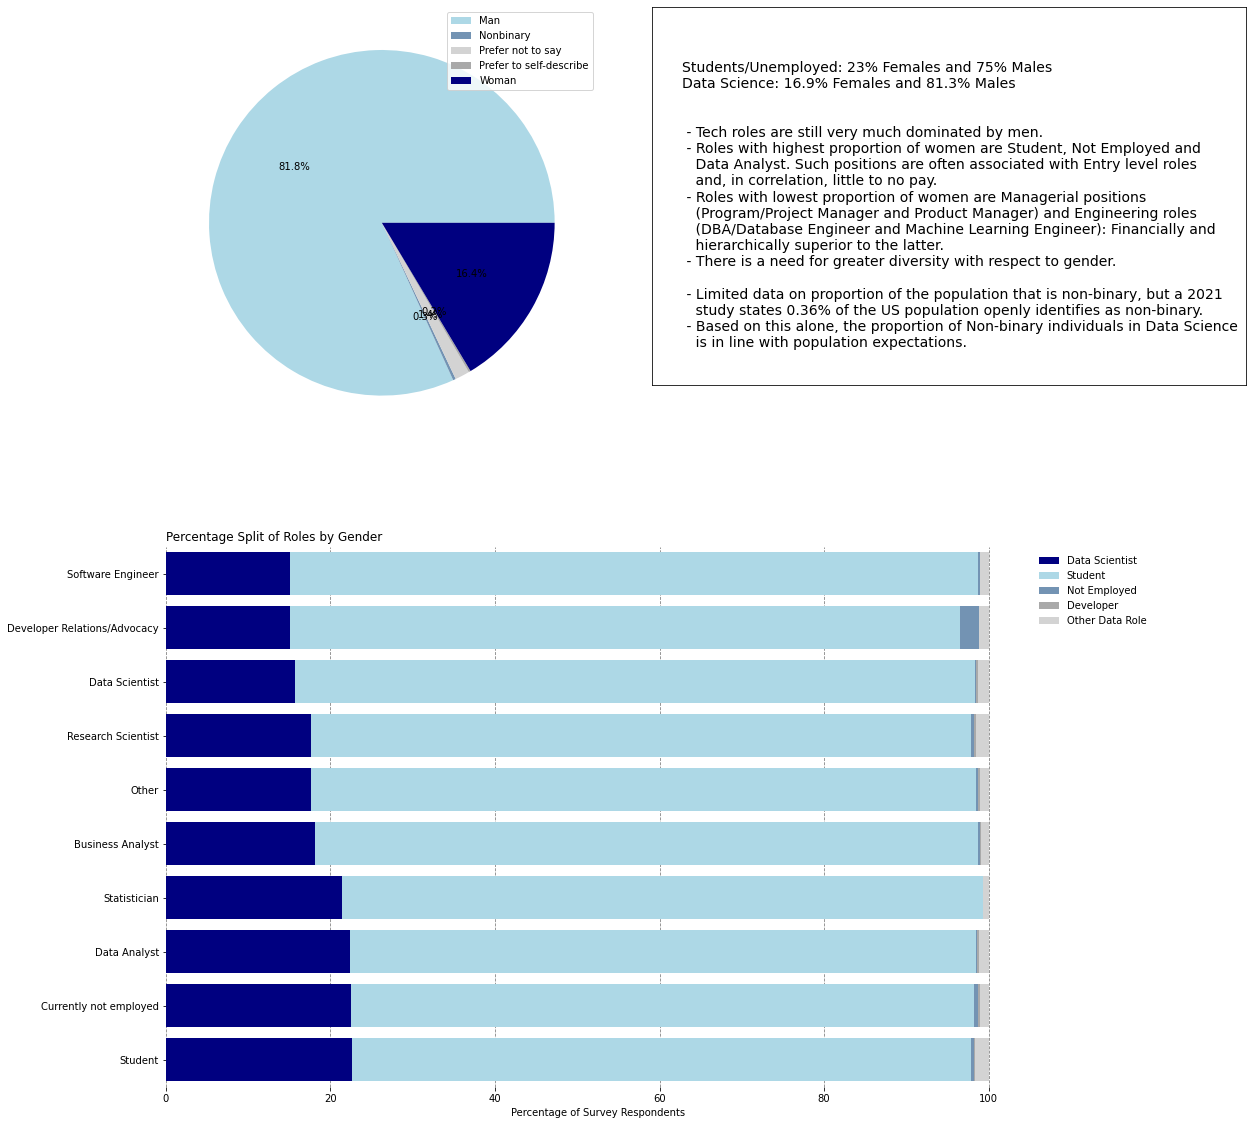

In [32]:
pie_colors = ["lightblue", "#7393B3", "lightgrey", "darkgrey", "Navy"]

gr2_fields = ['Woman', 'Man', 'Nonbinary', 'Prefer to self-describe', 'Prefer not to say']
gr2_colors = ["Navy", "lightblue", "#7393B3", "darkgrey", "lightgrey"]
gr2_labels = ['Woman', 'Man', 'Nonbinary', 'Prefer to self-describe', 'Prefer not to say']


plt.figure(figsize = (15, 15))

ax1 = plt.axes([0.0, 0.6, 0.4, 0.4])
ax1.axis('off')
ax2 = plt.axes([0.0, 0.0, 0.8, 0.5])
ax3 = plt.axes([0.45, 0.65, 0.55, 0.35])
ax3.set_xticks([])
ax3.set_yticks([])

## ax1
ax1.pie(df_ds.groupby([('q2_gender', 'gender')]).count().iloc[:, 0], autopct = '%1.1f%%', colors = pie_colors)
ax1.legend(labels = df_ds.groupby([('q2_gender', 'gender')]).count().iloc[:, 0].index)

## ax2
left = len(gr2) * [0]
for idx, name in enumerate(gr2_fields):
    ax2.barh(gr2.index, gr2[name], left = left, color = gr2_colors[idx])
    left = left + gr2[name]
# title, legend, labels
ax2.set_title('Percentage Split of Roles by Gender', loc = 'left')
ax2.legend(labels, bbox_to_anchor = ([1, 1, 0, 0]), ncol = 1, frameon = False, loc = 2, prop = {'size': 10})
ax2.set_xlabel('Percentage of Survey Respondents')
# remove spines
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
ax2.set_ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax2.set_axisbelow(True)
ax2.xaxis.grid(color = 'gray', linestyle = 'dashed')


#ax3.text(0.05, 0.1, 'Roles with highest proportion of women\nare Student, Not Employed and Data\nAnalyst. Such positions are often\nassociated with Entry level roles and, in\ncorrelation, little to no pay.\nRoles with lowest proportion of women\nare Managerial positions\n(Program/Project Manager and Product\nManager) and Engineering roles\n(DBA/Database Engineer and Machine\nLearning Engineer): Financially and\nhierarchically superior to the latter.\nThere is a need for greater diversity\nwith respect to gender. ')

ax3.text(0.05, 0.1, 'Students/Unemployed: 23% Females and 75% Males\nData Science: 16.9% Females and 81.3% Males\n\n\n - Tech roles are still very much dominated by men.\n - Roles with highest proportion of women are Student, Not Employed and\n   Data Analyst. Such positions are often associated with Entry level roles\n   and, in correlation, little to no pay.\n - Roles with lowest proportion of women are Managerial positions\n   (Program/Project Manager and Product Manager) and Engineering roles\n   (DBA/Database Engineer and Machine Learning Engineer): Financially and\n   hierarchically superior to the latter.\n - There is a need for greater diversity with respect to gender.\n\n - Limited data on proportion of the population that is non-binary, but a 2021\n   study states 0.36% of the US population openly identifies as non-binary.\n - Based on this alone, the proportion of Non-binary individuals in Data Science\n   is in line with population expectations.',
         fontsize = 14)

plt.show()


In [33]:
## preparing data for stacked bar charts

gen_role_percent = (df_fil.groupby([('q4_education', 'education'), ('q2_gender', 'gender')])
                    .size().unstack(level = -1).reset_index())
gen_role_percent = gen_role_percent.fillna(0)
cols = ['Man', 'Woman', 'Nonbinary', 'Prefer not to say', 'Prefer to self-describe']   
gen_role_percent[cols] = round(gen_role_percent[cols] / (gen_role_percent[cols].sum())*100, 2)
gen_role_percent = gen_role_percent.transpose()
gen_role_percent = gen_role_percent.rename(columns=gen_role_percent.iloc[0])
gen_role_percent = gen_role_percent.drop(gen_role_percent.index[0])


edu_gen = (df_ds.groupby([('q4_education', 'education'), ('q2_gender', 'gender')])
           .size().unstack(level=-1).reset_index())

<ipython-input-34-a2e29b488f90>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Woman', 'Prefer to\nself-describe', 'Prefer not\nto say', 'Non-binary', 'Man'], rotation = 40)
<ipython-input-34-a2e29b488f90>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['Prefer not\nto answer', 'PhD', 'No formal\neducation\npast high school', 'Master\'s\ndegree',


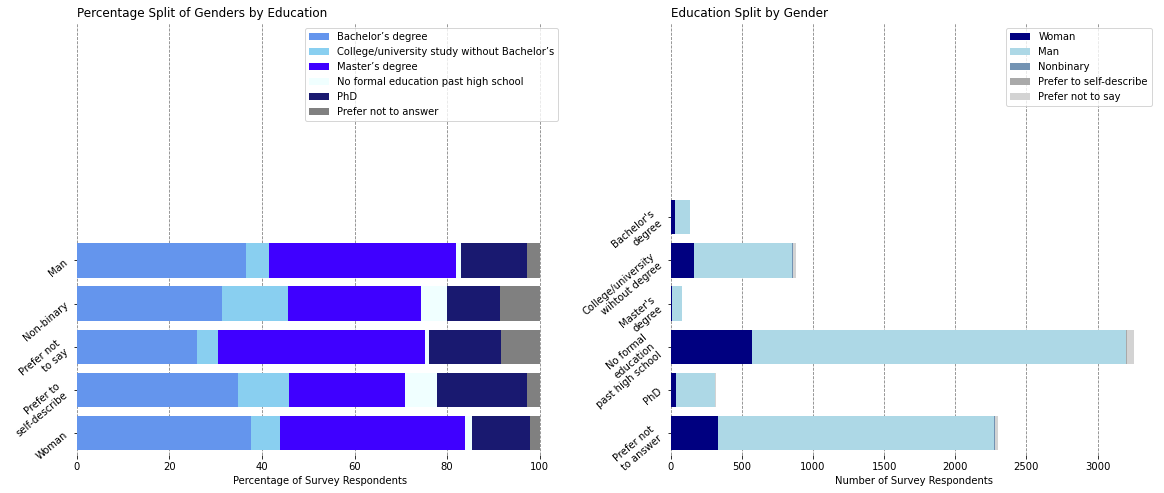

In [34]:
perc_fields = ['Bachelor’s degree', 'College/university study without Bachelor’s', 'Master’s degree',
               'No formal education past high school', 'PhD', 'Prefer not to answer']
perc_colors = ["#6495ED", "#89CFF0", "#3F00FF", '#F0FFFF', "midnightblue", "grey"]
perc_labels = ['Bachelor’s degree', 'College/university study without Bachelor’s', 'Master’s degree',
               'No formal education past high school', 'PhD', 'Prefer not to answer']


fields = ['Woman', 'Man', 'Nonbinary', 'Prefer to self-describe', 'Prefer not to say']
colors = ["Navy", "lightblue", "#7393B3", "darkgrey", "lightgrey"]
labels = ['Woman', 'Man', 'Nonbinary', 'Prefer to self-describe', 'Prefer not to say']


plt.figure(figsize = (15, 6))

ax1 = plt.axes([0.0, 0.0, 0.45, 1.0])
ax2 = plt.axes([0.55, 0.0, 0.45, 1.0])


## ax1

left = len(gen_role_percent) * [0]
for idx, name in enumerate(perc_fields):
    ax1.barh(gen_role_percent.index, gen_role_percent[name], left = left, color = perc_colors[idx])
    left = left + gen_role_percent[name]

ax1.set_title('Percentage Split of Genders by Education', loc='left')
ax1.legend(perc_labels, ncol = 1, frameon = True, loc = 'upper right', prop = {'size': 10})
ax1.set_xlabel('Percentage of Survey Respondents')
ax1.set_yticklabels(['Woman', 'Prefer to\nself-describe', 'Prefer not\nto say', 'Non-binary', 'Man'], rotation = 40)
# remove spines
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
ax1.set_ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax1.set_axisbelow(True)
ax1.xaxis.grid(color = 'gray', linestyle = 'dashed')


## ax2

left = len(edu_gen) * [0]
for idx, name in enumerate(fields):
    plt.barh(edu_gen[('q4_education', 'education')], edu_gen[name], left = left, color=colors[idx])
    left = left + edu_gen[name]

ax2.set_title('Education Split by Gender', loc = 'left')
ax2.legend(labels, ncol = 1, frameon = True, loc = 'upper right', prop = {'size': 10})
ax2.set_xlabel('Number of Survey Respondents')
ax2.set_yticklabels(['Prefer not\nto answer', 'PhD', 'No formal\neducation\npast high school', 'Master\'s\ndegree',
                     'College/university\nwihtout degree', 'Bachelor\'s\ndegree'], rotation = 40)
# remove spines
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
ax2.set_ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax2.set_axisbelow(True)
ax2.xaxis.grid(color = 'gray', linestyle = 'dashed')


plt.show()

#### Gender and education

The data supports the premise that women feel they need to be further educated to land a career.

Despite the number of degrees being almost equal to male respondents, there are less women in Data Science.

In reality, a STEM background or post graduate degree is not a requirement for being a great Data Scientist.

In [35]:
## preparing data for horizontal bar charts

age_gen = df_ds.groupby([('q2_gender', 'gender'), ('q1_age', 'age')]).size().unstack(level=-1).reset_index()
age_gen = age_gen.transpose()
age_gen = age_gen.rename(columns = age_gen.iloc[0])
age_gen = age_gen.drop(age_gen.index[0])

stu_gen = (df_js[df_js.r01_title.title == 'Student/Not Employed']
           .groupby([('q2_gender', 'gender'), ('q1_age', 'age')]).size().unstack(level=-1).reset_index())
stu_gen = stu_gen.transpose()
stu_gen = stu_gen.rename(columns=stu_gen.iloc[0])
stu_gen = stu_gen.drop(stu_gen.index[0])

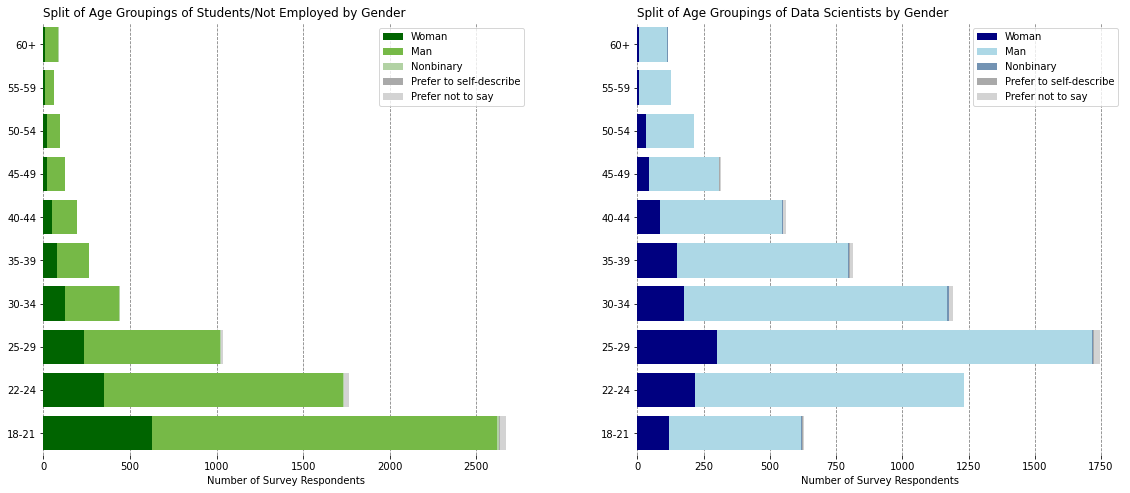

In [36]:
stu_fields = ['Woman', 'Man', 'Nonbinary', 'Prefer to self-describe', 'Prefer not to say']
stu_colors = ['darkgreen', '#76B947', '#B2D2A4', 'darkgrey', 'lightgrey']
stu_labels = ['Woman', 'Man', 'Nonbinary', 'Prefer to self-describe', 'Prefer not to say']

age_fields = ['Woman', 'Man', 'Nonbinary', 'Prefer to self-describe', 'Prefer not to say']
age_colors = ['Navy', 'lightblue', '#7393B3', 'darkgrey', 'lightgrey']
age_labels = ['Woman', 'Man', 'Nonbinary', 'Prefer to self-describe', 'Prefer not to say']


plt.figure(figsize = (15, 6))

ax1 = plt.axes([0.0, 0.0, 0.45, 1.0])
ax2 = plt.axes([0.55, 0.0, 0.45, 1.0])


## ax1

left = len(stu_gen) * [0]
for idx, name in enumerate(stu_fields):
    ax1.barh(stu_gen.index, stu_gen[name], left = left, color = stu_colors[idx])
    left = left + stu_gen[name]

ax1.set_title('Split of Age Groupings of Students/Not Employed by Gender', loc='left')
ax1.legend(stu_labels, ncol = 1, frameon = True, loc = 'upper right', prop = {'size': 10})
ax1.set_xlabel('Number of Survey Respondents')
# remove spines
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
ax1.set_ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax1.set_axisbelow(True)
ax1.xaxis.grid(color='gray', linestyle='dashed')


## ax2

left = len(age_gen) * [0]
for idx, name in enumerate(age_fields):
    ax2.barh(age_gen.index, age_gen[name], left = left, color = age_colors[idx])
    left = left + age_gen[name]

ax2.set_title('Split of Age Groupings of Data Scientists by Gender', loc = 'left')
ax2.legend(age_labels, ncol = 1, frameon = True, loc = 'upper right', prop = {'size': 10})
ax2.set_xlabel('Number of Survey Respondents')
# remove spines
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
ax2.set_ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax2.set_axisbelow(True)
ax2.xaxis.grid(color = 'gray', linestyle = 'dashed')


plt.show()

#### Are more women getting into Data Science?

From these graphs, we can see that a lot more women seem to decide to continue their studies, in comparison to men who seem to jump straight into a Data career between 18-21.

It is shocking that there were only male Data Scientists between the ages of 22-24.

It seems that a lot of women decide against education after 30.

## Education level

In [37]:
## preparing data for horizontal bar chart and pie chart

gen_role_percent = (df_fil.groupby([('q4_education', 'education'), ('q2_gender', 'gender')])
                    .size().unstack(level = -1).reset_index())
gen_role_percent = gen_role_percent.fillna(0)
cols = ['Man', 'Woman', 'Nonbinary', 'Prefer not to say', 'Prefer to self-describe']   
gen_role_percent[cols] = round(gen_role_percent[cols] / (gen_role_percent[cols].sum())*100, 2)
gen_role_percent = gen_role_percent.transpose()
gen_role_percent = gen_role_percent.rename(columns=gen_role_percent.iloc[0])
gen_role_percent = gen_role_percent.drop(gen_role_percent.index[0])


edu_pie = (df_fil.groupby([('r01_title', 'title_sep'), ('q4_education', 'education')])
           .size().unstack(level = -1).reset_index())
edu_pie = edu_pie.loc[edu_pie[('r01_title', 'title_sep')] == 'Data Scientist'].copy()
edu_pie = edu_pie.transpose()
edu_pie = edu_pie.rename(columns = edu_pie.iloc[0])
edu_pie = edu_pie.drop(edu_pie.index[0])
edu_pie = edu_pie.sort_values('Data Scientist')

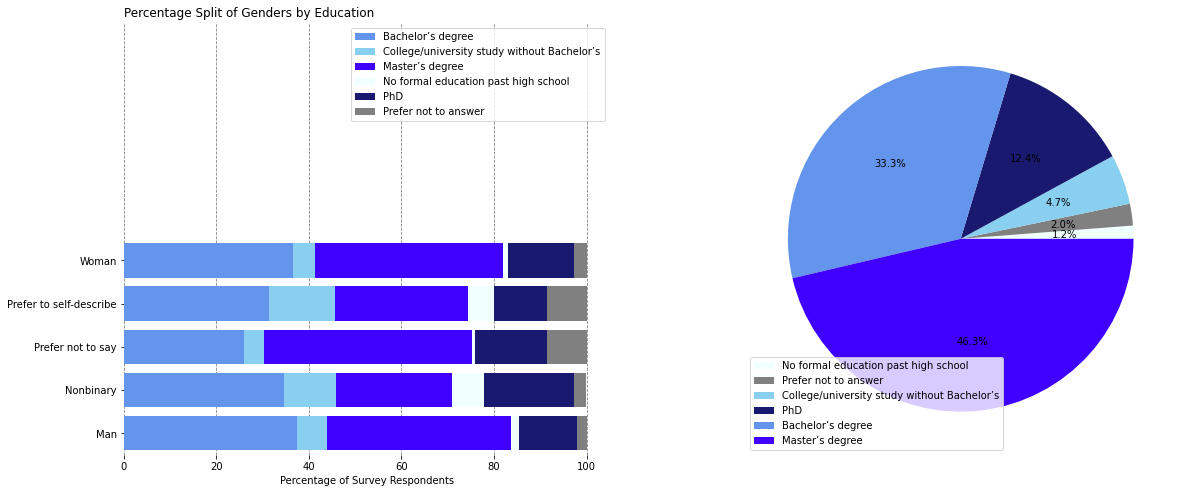

In [38]:
bar_fields = ['Bachelor’s degree', 'College/university study without Bachelor’s', 'Master’s degree',
          'No formal education past high school', 'PhD', 'Prefer not to answer']
bar_colors = ["#6495ED", "#89CFF0", "#3F00FF", '#F0FFFF', "midnightblue", "grey"]
bar_labels = ['Bachelor’s degree', 'College/university study without Bachelor’s', 'Master’s degree',
          'No formal education past high school', 'PhD', 'Prefer not to answer']

pie_colors = ["#F0FFFF", "grey", "#89CFF0", 'midnightblue', "#6495ED", "#3F00FF"]


plt.figure(figsize = (15, 6))

ax1 = plt.axes([0.0, 0.0, 0.45, 1.0])
ax2 = plt.axes([0.55, 0.0, 0.45, 1.0])


## ax1

left = len(gen_role_percent) * [0]
for idx, name in enumerate(bar_fields):
    ax1.barh(gen_role_percent.index, gen_role_percent[name], left = left, color = bar_colors[idx])
    left = left + gen_role_percent[name]
# title, legend, labels
ax1.set_title('Percentage Split of Genders by Education', loc = 'left')
ax1.legend(bar_labels, ncol = 1, frameon = True, loc = 'upper right', prop={'size': 10})
ax1.set_xlabel('Percentage of Survey Respondents')
# remove spines
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
ax1.set_ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax1.set_axisbelow(True)
ax1.xaxis.grid(color = 'gray', linestyle='dashed')


## ax2

ax2.pie(edu_pie['Data Scientist'].values, autopct = '%1.1f%%', colors = pie_colors)
ax2.legend(labels = edu_pie.index)


plt.show()

#### Education and role

Majority of Data Scientists hold a Master's Degree, with 8.2% holding less than a Bachelor's.

Contrast, most students hold a Bachelor's degree. 

## Languages

In [40]:
## preparing data for bar charts

role_course = df_fil[['r01_title', 'q7_language']]
role_course = role_course.drop(columns = {('r01_title', 'title_sep'), ('q7_language', 'none')})
role_course = role_course.groupby(('r01_title', 'title')).sum()
lang_filt = role_course.drop(['Developer', 'Other', 'Other Data Role'])
lang_filt = lang_filt.transpose().reset_index()
lang_filt.drop(columns = 'level_0', inplace = True)

df_lan = pd.melt(lang_filt, id_vars = ['level_1'], var_name = 'Role', value_name = 'Value')
df_lan = df_lan.sort_values(['Role', 'Value'], ascending = False)
df_lan.level_1 = df_lan.level_1.replace('cpp', 'c++')

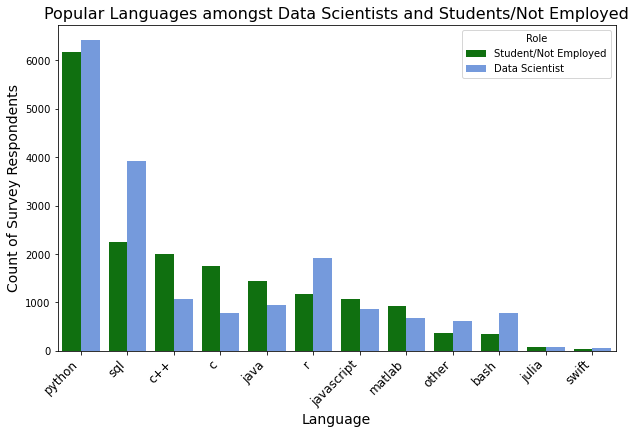

In [41]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'level_1', y = "Value", hue = 'Role', data = df_lan, palette = ['green', 'cornflowerblue'])
plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'normal',
           fontsize = 'large',
           fontfamily = 'sans-serif')
plt.ylabel("Count of Survey Respondents", size = 14)
plt.xlabel("Language", size = 14)
plt.title("Popular Languages amongst Data Scientists and Students/Not Employed", size = 16)

plt.show()

Python is the most popular language in both the jobseeker and data scientist groups. We wanted to see which other languages are most popularly combined with it.

In [42]:
## for this, we defined a function to select popular combinations

def combo_01(df, column, num):
    '''function that takes a multiheaded binary frame and checks for the count of unique combinations.
    
    df: data frame
    column: name of super header (str)
    num: the number of elements in each unique combination (int)
    
    returns a dictionary where the key is the combination and values are the counts.'''
    row_matrix = []
    for i in range(len(df)):
        # we create a binary string indicating whether the given language is known or not
        row_matrix.append(''.join([str(j) for j in df[column].iloc[i, :]]))
    
    # we retain the base ten value of each laguage based on their position in the frame. python, for example is fourth
    # from the right, therefore its binary representation is 1000, so in base ten its 8
    d_val = {}
    for i in range(len(df[column].columns)):
        d_val[df[column].columns[i]] = 2 ** (len(df[column].columns) - 1 - i)
    
    d_comb = {}
    for i in combinations(df[column].columns, num):
        com = 0
        val = 0
        # using our dictionary of language values, we create a sum of the combination of languages. we will use this
        # to compare each row's binary represenation and see if it matches a combination
        for j in range(len(i)):
            com += d_val[i[j]]
        # we are looking through our binary strings based on each row
        for k in range(len(row_matrix)):
            # we use binary operators to see if a row satisfies our criteria
            if (int(row_matrix[k], 2) & com) == com:
                # if it does, we add a value to that combination
                val += 1
            else:
                continue
        # finally, we update our dictionary of combinations and their values
        d_comb['-'.join(i)] = val
    
    return d_comb

In [43]:
## for more flexible comparison, we also created rookie and experienced data scientists (based on years of experience)
## as well as a successful data scientist category (based on salary)

df_roo = df_ds[[(x in ['1-3 years', '< 1 years']) for x in df_ds.q6_yrs_of_experience.yrs_of_experience]]
df_exp = df_ds[[not (x in ['1-3 years', '< 1 years']) for x in df_ds.q6_yrs_of_experience.yrs_of_experience]]
df_suc = df_ds[[(x in ['100,000-124,999''125,000-149,999', '200,000-249,999', '150,000-199,999', '300,000-499,999',
                       '250,000-299,999', '$500,000-999,999', '>$1,000,000']) for x in df_ds.q25_salary.salary]]

In [44]:
## preparing data for dumbbell plot

lan_roo = pd.Series(combo_01(df_roo, 'q7_language', 2)) / len(df_roo) * 100
lan_exp = pd.Series(combo_01(df_exp, 'q7_language', 2)) / len(df_roo) * 100
lan_js = pd.Series(combo_01(df_js, 'q7_language', 2)) / len(df_js) * 100

lan_roo = lan_roo[[('python' in i) for i in lan_roo.index]].copy()
lan_exp = lan_exp[[('python' in i) for i in lan_exp.index]].copy()
lan_js = lan_js[[('python' in i) for i in lan_js.index]].copy()

df_lan = lan_roo.to_frame().join(lan_exp.to_frame(), rsuffix = '_e').join(lan_js.to_frame(), rsuffix = '_su')
df_lan.columns = ['rookies', 'exp', 'js']
df_lan = df_lan.sort_values(by = 'js', ascending = False).iloc[: 10, :].copy()
df_lan.index = [i.replace('python', '').replace('-', '').replace('pp', '++') for i in df_lan.index]

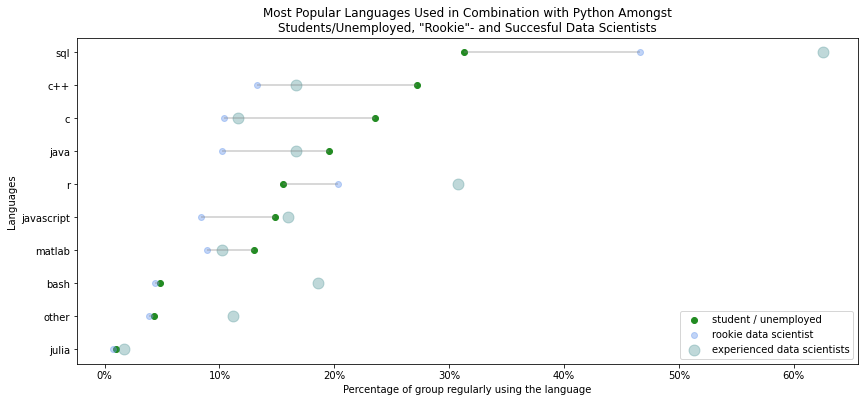

In [45]:
fig = plt.figure(figsize = (14, 6))
ax = fig.add_subplot(1, 1, 1)

# Reorder df following the values of the first value:
df_lan = df_lan.sort_values(by = 'js')
my_range = range(1, len(df_lan.index) + 1)

# The horizontal plot is made using the hline function
plt.hlines(y = my_range, xmin = df_lan['js'], xmax = df_lan['rookies'], color = 'grey', alpha = 0.4)
plt.scatter(df_lan['js'], my_range, color = 'forestgreen', alpha = 1, label = 'student / unemployed')
plt.scatter(df_lan['rookies'], my_range, color = 'cornflowerblue', alpha = 0.4 , label = 'rookie data scientist')
plt.scatter(df_lan['exp'], my_range, color = 'cadetblue', alpha = 0.4 ,
            label = 'experienced data scientists', s = 120)
plt.legend(loc = 'lower right')



# Add title and axis names
plt.yticks(my_range, df_lan.index)
plt.title('Most Popular Languages Used in Combination with Python Amongst\nStudents/Unemployed, "Rookie"- and Succesful Data Scientists')
plt.xlabel('Percentage of group regularly using the language')
plt.ylabel('Languages')

ax.xaxis.set_major_formatter(mtick.PercentFormatter())


plt.show()


#### Language popularity and experience

The proportion of jobseekers using Python (93%) is practically the same as people already in the industry.

However, when it comes to using other languages in conjunction with Python, their numbers vary and in the case of SQL, significantly fall behind.

Jobseekers may want to consider exploring languages other than python. SQL, for example, would pair well with python because of its database management capabilities.

## Data science tools

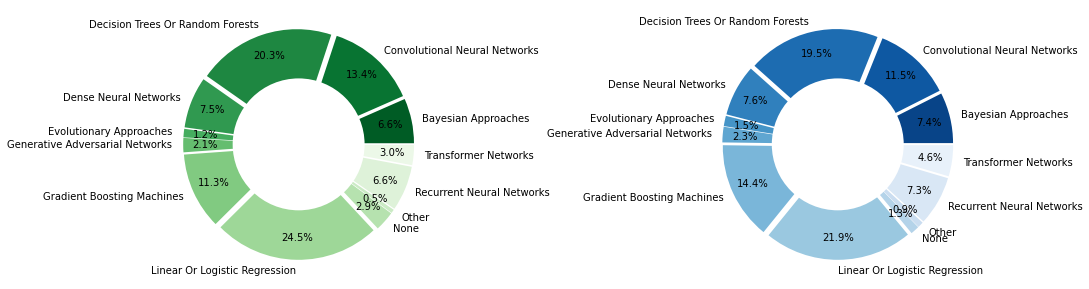

In [46]:
js_palette = sns.color_palette("Greens", n_colors=12)
js_palette.reverse()
js_labels = [i.replace('_', ' ').title() for i in df_js.q17_ml_algorithm.sum().index]

ds_palette = sns.color_palette("Blues", n_colors=12)
ds_palette.reverse()
ds_labels = [i.replace('_', ' ').title() for i in df_ds.q17_ml_algorithm.sum().index]

# Segment explosions
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)


plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.pie(df_js.q17_ml_algorithm.sum(), colors = js_palette, labels = js_labels, explode = explode,
        autopct='%1.1f%%', pctdistance=0.8)

# Donut
#draw circle
centre_circle = plt.Circle((0, 0), 0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()




plt.subplot(1, 2, 2)

plt.pie(df_ds.q17_ml_algorithm.sum(), colors = ds_palette, labels = ds_labels, explode = explode,
        autopct = '%1.1f%%', pctdistance = 0.8)


centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()


plt.show()

#### Most popular machine learning algorithms


Jobseekers are interested in the same ML Algorithms as Data Scientists


This is great statistically but there is no right or wrong ML algorithm, jobseekers should consider what type of work they would like to do as this will dictate the oath they should take

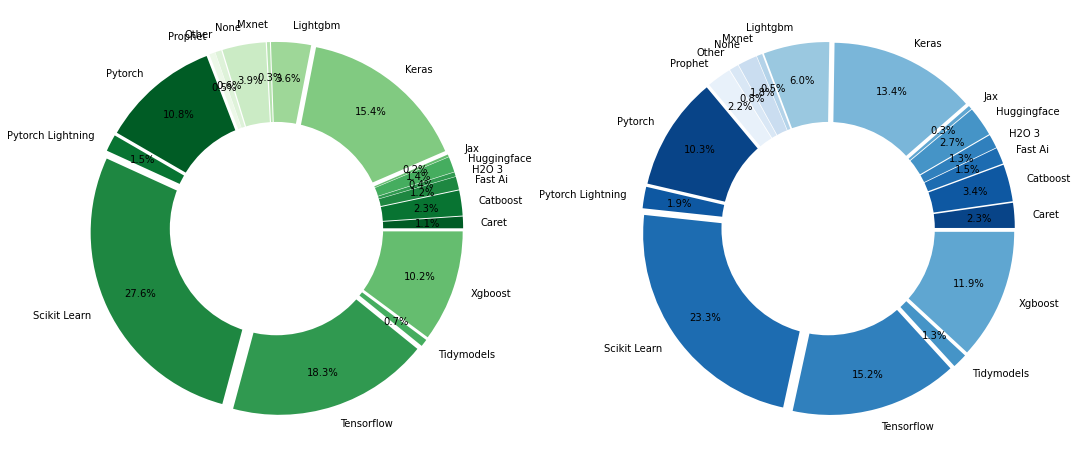

In [47]:
js_palette = sns.color_palette("Greens", n_colors=12)
js_palette.reverse()
js_labels = [i.replace('_', ' ').title() for i in df_js.q16_ml.sum().index]

ds_palette = sns.color_palette("Blues", n_colors=12)
ds_palette.reverse()
ds_labels = [i.replace('_', ' ').title() for i in df_ds.q16_ml.sum().index]

# Segment explosions
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)


plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.pie(df_js.q16_ml.sum(), colors = js_palette, labels = js_labels, explode = explode,
        autopct='%1.1f%%', pctdistance=0.8)

# Donut
#draw circle
centre_circle = plt.Circle((0, 0), 0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()




plt.subplot(1, 2, 2)

plt.pie(df_ds.q16_ml.sum(), colors = ds_palette, labels = ds_labels, explode = explode,
        autopct = '%1.1f%%', pctdistance = 0.8)


centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()


plt.show()

#### Most popular ML frameworks


Scikit-Learn is most popular with very big or very small companies.


Tensorflow, Keras and Pytorch are most popular with company size 0-49.


Jobseekers can focus their studies on based on where they might like to work. Doing some research would be beneficial.

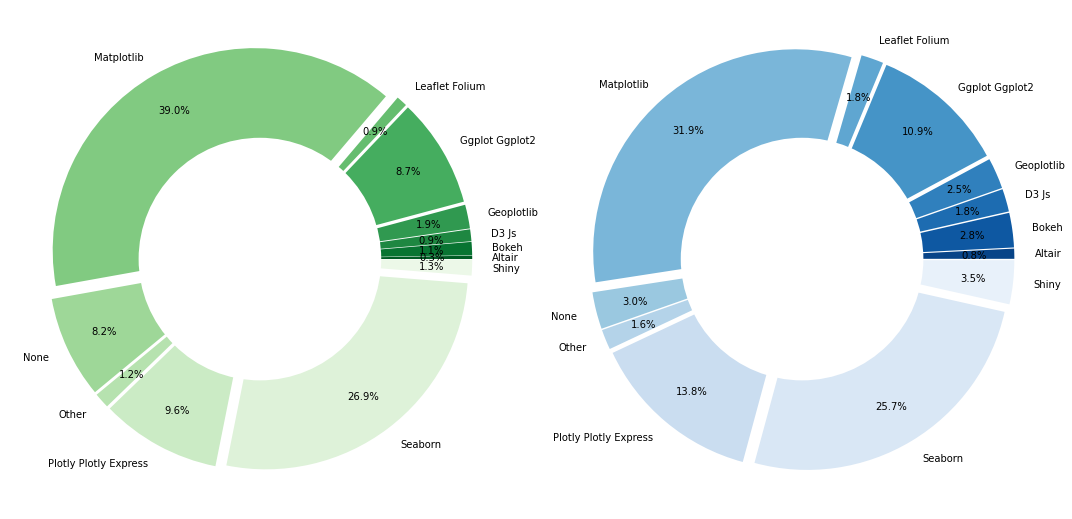

In [48]:
js_palette = sns.color_palette("Greens", n_colors=12)
js_palette.reverse()
js_labels = [i.replace('_', ' ').title() for i in df_js.q14_viz.sum().index]

ds_palette = sns.color_palette("Blues", n_colors=12)
ds_palette.reverse()
ds_labels = [i.replace('_', ' ').title() for i in df_ds.q14_viz.sum().index]

# Segment explosions
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)


plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.pie(df_js.q14_viz.sum(), colors = js_palette, labels = js_labels, explode = explode,
        autopct='%1.1f%%', pctdistance=0.8)

# Donut
#draw circle
centre_circle = plt.Circle((0, 0), 0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)  
plt.tight_layout()




plt.subplot(1, 2, 2)

plt.pie(df_ds.q14_viz.sum(), colors = ds_palette, labels = ds_labels, explode = explode,
        autopct = '%1.1f%%', pctdistance = 0.8)


centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()


plt.show()

#### Most popular visualisation tools


Matplotlib and Seaborn are clear leaders for visualization which makes sense are they are relatively simple to use.


Tools like ploty should not be discounted as it has features which make it standout.


ggplot and ggplot2 tend to be more favourable among those who use the language R.

## Industry

In [49]:
## preparing data for bar chart

ind_datsci = df_ds.groupby([('q20_industry', 'industry')]).count()[('q0_duration', 'duration')].sort_values(ascending = False)


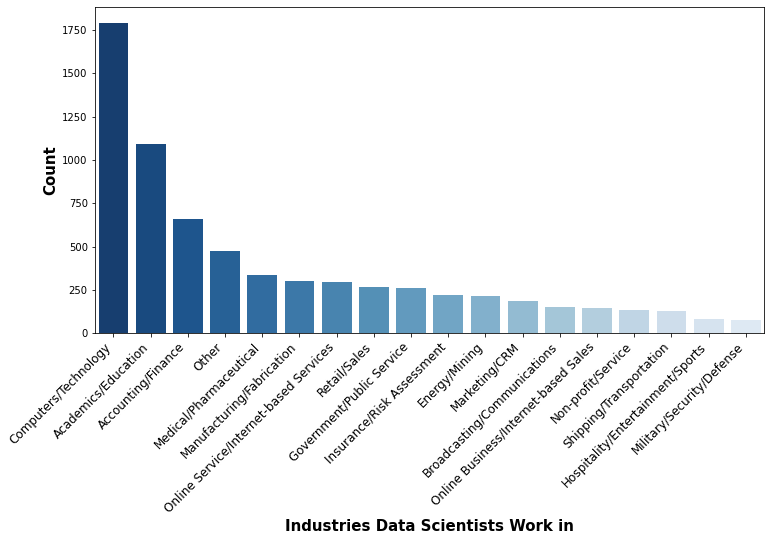

In [50]:
plt.figure(figsize = (12, 6))
palette = sns.color_palette("Blues", n_colors = 20)
palette.reverse()

sns.barplot(x = ind_datsci.index,
            y = ind_datsci.values,
            palette = palette)

plt.xlabel('Industries Data Scientists Work in',
           fontsize = '15',
           fontweight = 'bold')

plt.ylabel('Count',
           fontsize = '15',
           fontweight = 'bold')

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'normal',
           fontsize = 'large',
           fontfamily = 'sans-serif')

plt.show()

The most common industry for Data Scientists to work in is Computers/Technology.


This is followed by Academics/Education and Accounting/Finance.


Jobseekers should take note of the list of industries. Data Scientists are needed every where.

In [51]:
## preparing data for dumbbell plot

ind = df_suc.q20_industry.industry.value_counts(normalize = True)[: 5].index
ind.append(df_roo.q20_industry.industry.value_counts(normalize = True)[: 5].index)
ind.append(df_exp.q20_industry.industry.value_counts(normalize = True)[: 5].index)

df_suc2 = df_suc[[(x in ind) for x in df_suc.q20_industry.industry]].copy()
df_roo2 = df_roo[[(x in ind) for x in df_roo.q20_industry.industry]].copy()
df_exp2 = df_exp[[(x in ind) for x in df_exp.q20_industry.industry]].copy()

roo2 = df_roo2.q20_industry.industry.value_counts(normalize = True) * 100
suc2 = df_suc2.q20_industry.industry.value_counts(normalize = True) * 100
exp2 = df_exp2.q20_industry.industry.value_counts(normalize = True) * 100

df_com2 = roo2.to_frame().join(suc2, rsuffix = '_s').join(exp2, rsuffix = '_e')
df_com2.columns = ['rookies', 'successful', 'exp']
df_com2['min'] = df_com2.min(axis = 1)

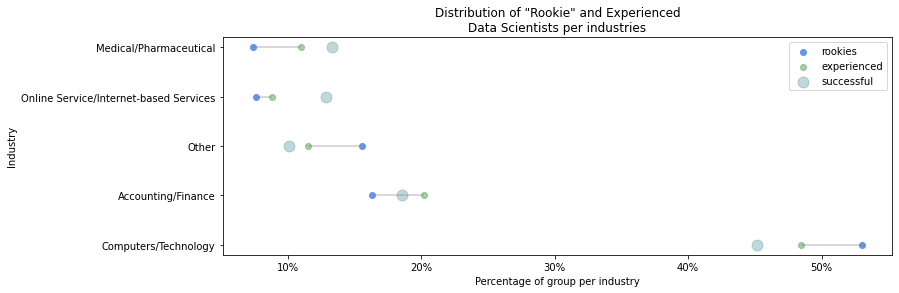

In [52]:
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(1, 1, 1)

# Reorder df following the values of the first value:
df_com2 = df_com2.sort_values(by = 'min', ascending = False)
my_range = range(1, len(df_com2.index) + 1)

# The horizontal plot is made using the hline function
plt.hlines(y = my_range, xmin = df_com2['rookies'], xmax = df_com2['exp'], color = 'grey', alpha = 0.4)
plt.scatter(df_com2['rookies'], my_range, color = 'cornflowerblue', alpha = 1,
            label = 'rookies')
plt.scatter(df_com2['exp'], my_range, color = 'forestgreen', alpha = 0.4 ,
            label = 'experienced')
plt.scatter(df_com2['successful'], my_range, color = 'cadetblue', alpha = 0.4 ,
            label = 'successful', s = 120)
plt.legend()



# Add title and axis names
plt.yticks(my_range, df_com2.index)
plt.title('Distribution of "Rookie" and Experienced\nData Scientists per industries')
plt.xlabel('Percentage of group per industry')
plt.ylabel('Industry')

ax.xaxis.set_major_formatter(mtick.PercentFormatter())


plt.show()

The most popular industry for both seasoned and newbie data scientists is computers and technology.


However, as employees gain experience, they seem to pursue their career in other areas.


Most notable is the pharmaceutical industry where only 7% of career starters end up but takes almost 15% of successful data scientists.

## Company size

In [53]:
df_ds.q21_company_size.value_counts()

company_size            
0-49 employees              2314
10,000 or more employees    1362
1000-9,999 employees        1160
50-249 employees            1072
250-999 employees            876
dtype: int64

The most common company size for Data Scientists to work in is 0-49 employees by far.


This is followed by large companies, particularly those of 10,000 employees or more.

In [54]:
## preparing data for dumbbell plot

roo = df_roo.q21_company_size.company_size.value_counts(normalize = True) * 100
suc = df_suc.q21_company_size.company_size.value_counts(normalize = True) * 100
exp = df_exp.q21_company_size.company_size.value_counts(normalize = True) * 100

df_com = roo.to_frame().join(suc, rsuffix = '_s').join(exp, rsuffix = '_e')
df_com.columns = ['rookies', 'successful', 'exp']
df_com = df_com.reindex(['10,000 or more employees', '1000-9,999 employees', '250-999 employees', '50-249 employees',
                         '0-49 employees'], copy = True)

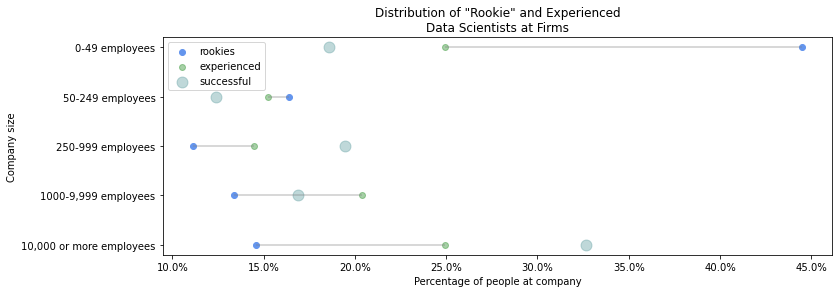

In [55]:
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(1, 1, 1)

# Reorder df following the values of the first value:
#df_com = df_com.sort_values(by = df_com.index)
my_range = range(1, len(df_com.index) + 1)

# The horizontal plot is made using the hline function
plt.hlines(y = my_range, xmin = df_com['rookies'], xmax = df_com['exp'], color = 'grey', alpha = 0.4)
plt.scatter(df_com['rookies'], my_range, color = 'cornflowerblue', alpha = 1,
            label = 'rookies')
plt.scatter(df_com['exp'], my_range, color = 'forestgreen', alpha = 0.4 ,
            label = 'experienced')
plt.scatter(df_com['successful'], my_range, color = 'cadetblue', alpha = 0.4 ,
            label = 'successful', s = 120)
plt.legend()



# Add title and axis names
plt.yticks(my_range, df_com.index)
plt.title('Distribution of "Rookie" and Experienced\nData Scientists at Firms')
plt.xlabel('Percentage of people at company')
plt.ylabel('Company size')

ax.xaxis.set_major_formatter(mtick.PercentFormatter())


plt.show()

#### Company size and experience

It appears that smaller companies are more likely to employ data scientists with less than 3 years of experience.


The least ideal place for those early in their career is companies with 250-999 employees. They employed only 11% of these respondents.


However, these companies also signify the turning point as these and larger organisations tend to employ a larger percentage of experienced data scientists.

In [56]:
## preparing data for polar bar chart

ind_size = df_ds.groupby([('q20_industry', 'industry'), ('q21_company_size', 'company_size')]).count()[('q0_duration', 'duration')].to_frame()
ind_size.reset_index(level=(0, 1), inplace=True)
ind_size.columns = ['Industry', 'Company Size', 'count']

In [57]:
fig = px.bar_polar(ind_size, r="count", theta="Industry",
                   color="Company Size", 
                   template="none",
                   color_discrete_sequence= px.colors.sequential.Teal)

fig.show()

#### Industry and company size


The largest Sector by far is Computers/Technology, no matter the company size.


When it comes to Academics/Education and Accounting/Finance, most Data Scientists tend to work in companies with 0-49 employees.

## Conclusion

#### Jobseekers now and beyond


Jobseekers should take heart that they are on the right track.


There is a need for diversity in the Data Science space. Persons who fall outside the norm should not be afraid to step forward.


Jobseekers sould focus their upskilling in the area they want to work and not just the popular things.​


While smaller companies might be more open to beginners, that doesn’t mean that larger companies should not be given a chance.

-------- 

We hope our insights were useful for jobseekers out there and the data science community alike. We definitelt enjoyed working on it!